In [6]:
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight

In [7]:
np.random.seed(12049)

In [8]:
def get_classes(data_path, classes, data):
    print(f"---- {data} ----")
    knee_severity = {}
    count = 0

    for i in range(len(classes)):
        imgs = os.listdir(os.path.join(data_path, str(i)))
        knee_severity[i] = imgs
        count += len(imgs)

    for k, v in knee_severity.items():
        print(
            f"Grade {k} - {classes[k]}: {len(v)} images, {round((len(v) * 100) / count, 2)}%"
        )

    return knee_severity


def plot_classes(dict_classes, data_path, classes, data):
    for k, v in dict_classes.items():
        print(f"{data} - {classes[k]}")
        plt.figure(figsize=(10, 25))
        for i in range(5):
            img_path = os.path.join(data_path, str(k), v[i])
            img = tf.keras.preprocessing.image.load_img(img_path)
            plt.subplot(1, 5, 1 + i, xticks=[], yticks=[])
            plt.imshow(img)
            plt.title(f"Grade {k}")
        plt.show()

In [9]:
class_names = ['Healthy', 'Doubtful', 'Minimal', 'Moderate', 'Severe']

In [10]:
base_dir ="C:\\Users\\vinnu\\Desktop\\6th Sem\\New folder\\New folder\\mini_project\\Dataset"
train_path = os.path.join(base_dir,'train')
# valid_path = os.path.join(base_dir, 'val')
# test_path = os.path.join(base_dir, 'test')

In [11]:
train_data = get_classes(train_path, class_names, 'Train')
# valid_data = get_classes(valid_path, class_names, 'Valid')
# tests_data = get_classes(test_path, class_names, 'Test')

---- Train ----
Grade 0 - Healthy: 2286 images, 39.56%
Grade 1 - Doubtful: 1046 images, 18.1%
Grade 2 - Minimal: 1516 images, 26.24%
Grade 3 - Moderate: 757 images, 13.1%
Grade 4 - Severe: 173 images, 2.99%


Train data - Healthy


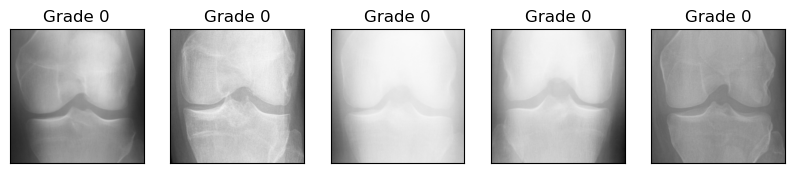

Train data - Doubtful


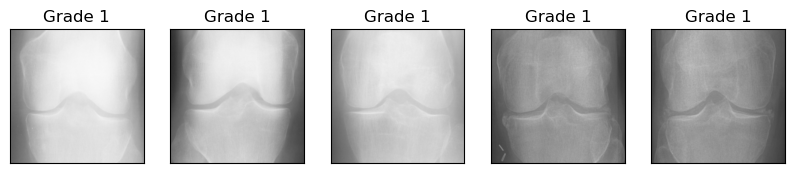

Train data - Minimal


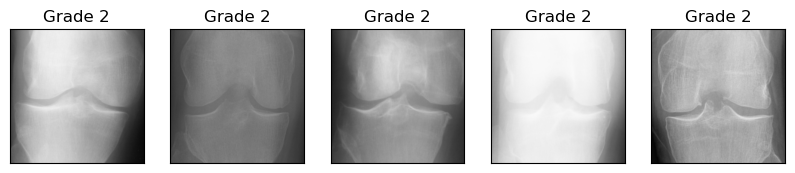

Train data - Moderate


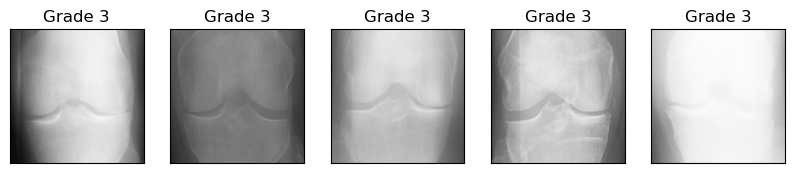

Train data - Severe


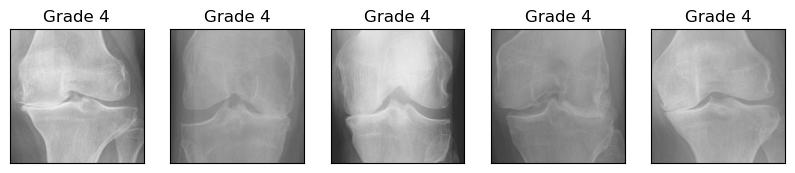

In [12]:
plot_classes(train_data, train_path, class_names, 'Train data')

In [13]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


Found 5778 images belonging to 5 classes.


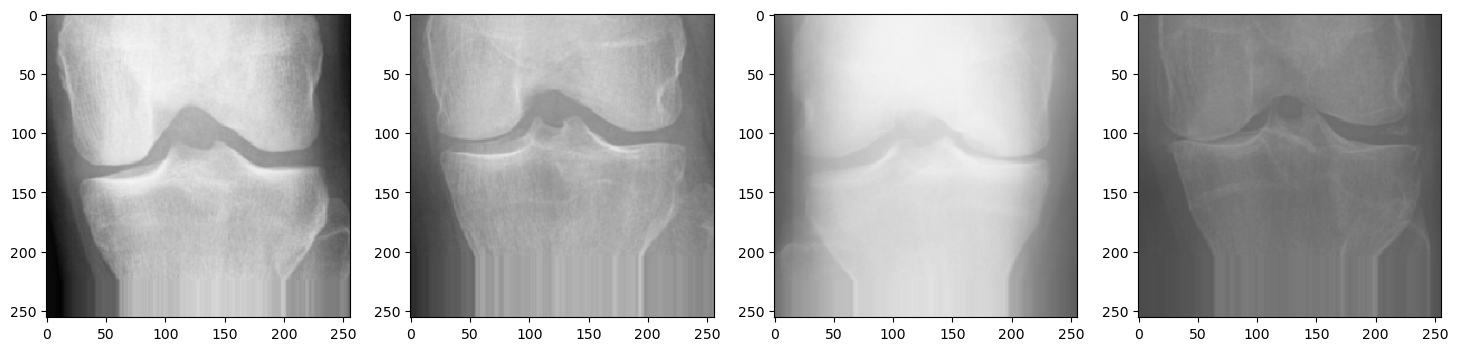

In [14]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=[-50,0,50,30,-30]
)
imagegen = datagen.flow_from_directory(train_path, batch_size=5)
fig, rows = plt.subplots(nrows=1, ncols=4, figsize=(18,18))
for row in rows:
    row.imshow(next(imagegen)[0][0].astype('uint8'))
plt.show()

Found 5778 images belonging to 5 classes.


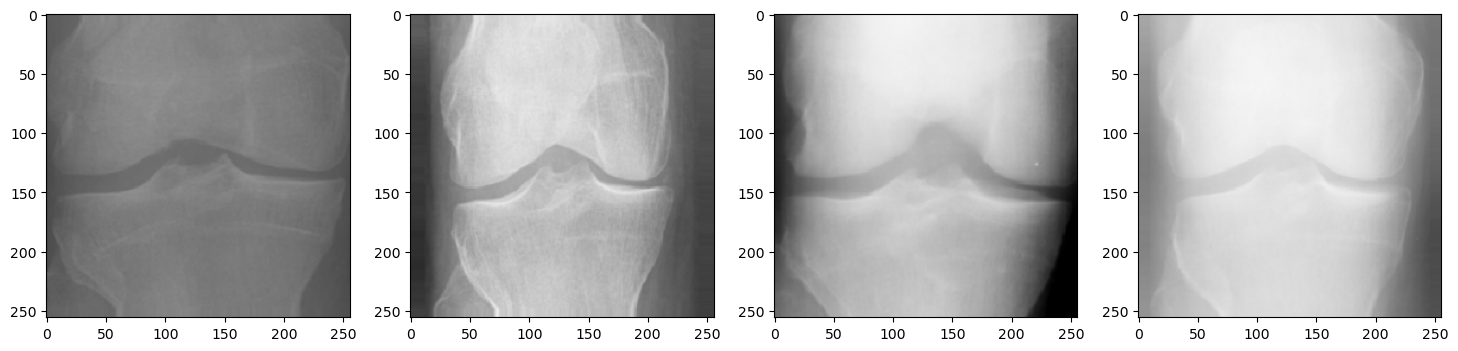

In [15]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=0.2
)
imagegen = datagen.flow_from_directory(train_path, batch_size=1)
fig, rows = plt.subplots(nrows=1, ncols=4, figsize=(18,18))
for row in rows:
    row.imshow(next(imagegen)[0][0].astype('uint8'))
plt.show()

Found 5778 images belonging to 5 classes.


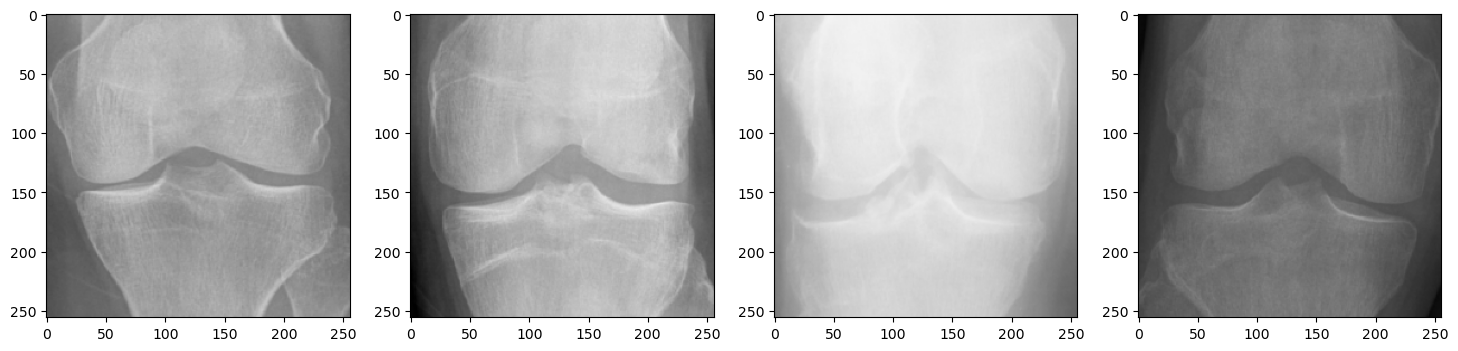

In [16]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True
)
imagegen = datagen.flow_from_directory(train_path, batch_size=1)
fig, rows = plt.subplots(nrows=1, ncols=4, figsize=(18,18))
for row in rows:
    row.imshow(next(imagegen)[0][0].astype('uint8'))
plt.show()

In [17]:
aug_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    horizontal_flip=True,
    brightness_range=[0.3, 0.8],
    width_shift_range=[-50, 0, 50, 30, -30],
    zoom_range=0.1,
    fill_mode="nearest",
)

noaug_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
)

In [18]:
target_size = (224, 224)

train_generator = aug_datagen.flow_from_directory(
    train_path,class_mode="categorical", target_size=target_size, shuffle=True
)

valid_generator = noaug_datagen.flow_from_directory(train_path,
    #valid_path=os.path.join(base_dir, 'test'),
    class_mode="categorical",
    target_size=target_size,
    shuffle=False,
)

Found 5778 images belonging to 5 classes.
Found 5778 images belonging to 5 classes.


In [19]:
y_train = train_generator.labels
y_val = valid_generator.labels

In [20]:
unique, counts = np.unique(y_train, return_counts=True)
print("Train ---> ", dict(zip(unique, counts)))

class_weights = compute_class_weight(
    class_weight="balanced", classes=np.unique(y_train), y=y_train
)
train_class_weights = dict(enumerate(class_weights))
print(train_class_weights)

Train --->  {0: 2286, 1: 1046, 2: 1516, 3: 757, 4: 173}
{0: 0.5055118110236221, 1: 1.1047801147227534, 2: 0.7622691292875989, 3: 1.5265521796565389, 4: 6.679768786127168}


In [21]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [22]:
import cv2
import os

# Specify input and output folders
input_folder =  "C:\\Users\\vinnu\\Desktop\\6th Sem\\New folder\\New folder\\mini_project\\Dataset\\test\\0"
output_folder = "C:\\Users\\vinnu\\Desktop\\6th Sem\\New folder\\New folder\\mini_project\\Dataset\\enhanced_images\\0"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Iterate through each image in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.png') or filename.endswith('.jpg'):  # Adjust based on your image format
        # Read the image
        image_path = os.path.join(input_folder, filename)
        original_image = cv2.imread(image_path)

        if original_image is None:
            print(f"Error: Unable to read image {filename}")
            continue

        # Convert to grayscale for histogram equalization
        gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

        # Apply histogram equalization
        enhanced_image = cv2.equalizeHist(gray_image)

        # Save the enhanced image to the output folder
        output_path = os.path.join(output_folder, filename)
        success = cv2.imwrite(output_path, enhanced_image)

        if success:
            print(f"Enhanced image saved to: {output_path}")
        else:
            print(f"Error: Unable to save enhanced image for {filename}")

print("Image enhancement and saving completed.")

Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project\Dataset\enhanced_images\0\9003175L.png
Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project\Dataset\enhanced_images\0\9003175R.png
Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project\Dataset\enhanced_images\0\9003316L.png
Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project\Dataset\enhanced_images\0\9003815L.png
Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project\Dataset\enhanced_images\0\9003815R.png
Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project\Dataset\enhanced_images\0\9004184R.png
Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project\Dataset\enhanced_images\0\9006407L.png
Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project

In [41]:
import cv2
import os

# Specify input and output folders
input_folder =  "C:\\Users\\vinnu\\Desktop\\6th Sem\\New folder\\New folder\\mini_project\\Dataset\\train\\1"
output_folder = "C:\\Users\\vinnu\\Desktop\\6th Sem\\New folder\\New folder\\mini_project\\Dataset\\enhanced_images\\1"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Iterate through each image in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.png') or filename.endswith('.jpg'):  # Adjust based on your image format
        # Read the image
        image_path = os.path.join(input_folder, filename)
        original_image = cv2.imread(image_path)

        if original_image is None:
            print(f"Error: Unable to read image {filename}")
            continue

        # Convert to grayscale for histogram equalization
        gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

        # Apply histogram equalization
        enhanced_image = cv2.equalizeHist(gray_image)

        # Save the enhanced image to the output folder
        output_path = os.path.join(output_folder, filename)
        success = cv2.imwrite(output_path, enhanced_image)

        if success:
            print(f"Enhanced image saved to: {output_path}")
        else:
            print(f"Error: Unable to save enhanced image for {filename}")

print("Image enhancement and saving completed.")

Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project\Dataset\enhanced_images\1\9000622L.png
Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project\Dataset\enhanced_images\1\9000622R.png
Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project\Dataset\enhanced_images\1\9001104L.png
Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project\Dataset\enhanced_images\1\9002316L.png
Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project\Dataset\enhanced_images\1\9002316R.png
Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project\Dataset\enhanced_images\1\9003430R.png
Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project\Dataset\enhanced_images\1\9004175L.png
Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project

In [20]:
import cv2
import os

# Specify input and output folders
input_folder =  "C:\\Users\\vinnu\\Desktop\\6th Sem\\New folder\\New folder\\mini_project\\Dataset\\train\\2"
output_folder = "C:\\Users\\vinnu\\Desktop\\6th Sem\\New folder\\New folder\\mini_project\\Dataset\\enhanced_images\\2"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Iterate through each image in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.png') or filename.endswith('.jpg'):  # Adjust based on your image format
        # Read the image
        image_path = os.path.join(input_folder, filename)
        original_image = cv2.imread(image_path)

        if original_image is None:
            print(f"Error: Unable to read image {filename}")
            continue

        # Convert to grayscale for histogram equalization
        gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

        # Apply histogram equalization
        enhanced_image = cv2.equalizeHist(gray_image)

        # Save the enhanced image to the output folder
        output_path = os.path.join(output_folder, filename)
        success = cv2.imwrite(output_path, enhanced_image)

        if success:
            print(f"Enhanced image saved to: {output_path}")
        else:
            print(f"Error: Unable to save enhanced image for {filename}")

print("Image enhancement and saving completed.")

Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project\Dataset\enhanced_images\2\9000099R.png
Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project\Dataset\enhanced_images\2\9000296R.png
Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project\Dataset\enhanced_images\2\9001695R.png
Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project\Dataset\enhanced_images\2\9002116R.png
Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project\Dataset\enhanced_images\2\9002411L.png
Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project\Dataset\enhanced_images\2\9002411R.png
Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project\Dataset\enhanced_images\2\9002430R.png
Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project

In [23]:
import cv2
import os

# Specify input and output folders
input_folder =  "C:\\Users\\vinnu\\Desktop\\6th Sem\\New folder\\New folder\\mini_project\\Dataset\\train\\3"
output_folder = "C:\\Users\\vinnu\\Desktop\\6th Sem\\New folder\\New folder\\mini_project\\Dataset\\enhanced_images\\3"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Iterate through each image in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.png') or filename.endswith('.jpg'):  # Adjust based on your image format
        # Read the image
        image_path = os.path.join(input_folder, filename)
        original_image = cv2.imread(image_path)

        if original_image is None:
            print(f"Error: Unable to read image {filename}")
            continue

        # Convert to grayscale for histogram equalization
        gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

        # Apply histogram equalization
        enhanced_image = cv2.equalizeHist(gray_image)

        # Save the enhanced image to the output folder
        output_path = os.path.join(output_folder, filename)
        success = cv2.imwrite(output_path, enhanced_image)

        if success:
            print(f"Enhanced image saved to: {output_path}")
        else:
            print(f"Error: Unable to save enhanced image for {filename}")

print("Image enhancement and saving completed.")

Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project\Dataset\enhanced_images\3\9000099L.png
Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project\Dataset\enhanced_images\3\9000296L.png
Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project\Dataset\enhanced_images\3\9001104R.png
Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project\Dataset\enhanced_images\3\9001897R.png
Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project\Dataset\enhanced_images\3\9002116L.png
Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project\Dataset\enhanced_images\3\9002430L.png
Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project\Dataset\enhanced_images\3\9002817R.png
Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project

In [24]:
import cv2
import os

# Specify input and output folders
input_folder =  "C:\\Users\\vinnu\\Desktop\\6th Sem\\New folder\\New folder\\mini_project\\Dataset\\train\\4"
output_folder = "C:\\Users\\vinnu\\Desktop\\6th Sem\\New folder\\New folder\\mini_project\\Dataset\\enhanced_images\\4"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Iterate through each image in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.png') or filename.endswith('.jpg'):  # Adjust based on your image format
        # Read the image
        image_path = os.path.join(input_folder, filename)
        original_image = cv2.imread(image_path)

        if original_image is None:
            print(f"Error: Unable to read image {filename}")
            continue

        # Convert to grayscale for histogram equalization
        gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

        # Apply histogram equalization
        enhanced_image = cv2.equalizeHist(gray_image)

        # Save the enhanced image to the output folder
        output_path = os.path.join(output_folder, filename)
        success = cv2.imwrite(output_path, enhanced_image)

        if success:
            print(f"Enhanced image saved to: {output_path}")
        else:
            print(f"Error: Unable to save enhanced image for {filename}")

print("Image enhancement and saving completed.")

Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project\Dataset\enhanced_images\4\9025994L.png
Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project\Dataset\enhanced_images\4\9031426R.png
Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project\Dataset\enhanced_images\4\9039627L.png
Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project\Dataset\enhanced_images\4\9049007L.png
Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project\Dataset\enhanced_images\4\9049507L.png
Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project\Dataset\enhanced_images\4\9053047L.png
Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project\Dataset\enhanced_images\4\9057150L.png
Enhanced image saved to: C:\Users\vinnu\Desktop\6th Sem\New folder\New folder\mini_project

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define input and output folder paths
input_folder ="C:\\Users\\vinnu\\Desktop\\6th Sem\\New folder\\New folder\\mini_project\\Dataset\\enhanced_images\\0"
output_folder = "C:\\Users\\vinnu\\Desktop\\6th Sem\\New folder\\New folder\\mini_project\\Dataset\\segmented\\0"

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Iterate through all images in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".png") or filename.endswith(".jpg"):  # Check for image extensions
        image_path = os.path.join(input_folder, filename)
        xray_image = cv2.imread(image_path)
        xray_image_rgb = cv2.cvtColor(xray_image, cv2.COLOR_BGR2RGB)

        # Reshape image to 2D array of pixels
        pixels = xray_image_rgb.reshape((-1, 3))
        pixels = np.float32(pixels)  # Convert to float for accuracy

        # Apply K-means segmentation
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
        k = 3  # Adjust cluster number if needed
        _, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

        # Convert centers to 8-bit values and map labels
        centers = np.uint8(centers)
        segmented_image = centers[labels.flatten()]
        segmented_image = segmented_image.reshape(xray_image_rgb.shape)

        # Save segmented image to output folder
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, segmented_image)

        # Optional: Display segmentation results
        # plt.figure(figsize=(10, 5))
        # plt.subplot(1, 2, 1)
        # plt.imshow(xray_image_rgb)
        # plt.title('Original X-ray Image')
        # plt.axis('off')

        # plt.subplot(1, 2, 2)
        # plt.imshow(segmented_image)
        # plt.title('Segmented Image (K-means)')
        # plt.axis('off')

        # plt.show()

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define input and output folder paths
input_folder ="C:\\Users\\vinnu\\Desktop\\6th Sem\\New folder\\New folder\\mini_project\\Dataset\\enhanced_images\\0"
output_folder = "C:\\Users\\vinnu\\Desktop\\6th Sem\\New folder\\New folder\\mini_project\\Dataset\\segmented\\0"

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Iterate through all images in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".png") or filename.endswith(".jpg"):  # Check for image extensions
        image_path = os.path.join(input_folder, filename)
        xray_image = cv2.imread(image_path)
        xray_image_rgb = cv2.cvtColor(xray_image, cv2.COLOR_BGR2RGB)

        # Reshape image to 2D array of pixels
        pixels = xray_image_rgb.reshape((-1, 3))
        pixels = np.float32(pixels)  # Convert to float for accuracy

        # Apply K-means segmentation
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
        k = 3  # Adjust cluster number if needed
        _, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

        # Convert centers to 8-bit values and map labels
        centers = np.uint8(centers)
        segmented_image = centers[labels.flatten()]
        segmented_image = segmented_image.reshape(xray_image_rgb.shape)

        # Save segmented image to output folder
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, segmented_image)

        # Optional: Display segmentation results
        # plt.figure(figsize=(10, 5))
        # plt.subplot(1, 2, 1)
        # plt.imshow(xray_image_rgb)
        # plt.title('Original X-ray Image')
        # plt.axis('off')

        # plt.subplot(1, 2, 2)
        # plt.imshow(segmented_image)
        # plt.title('Segmented Image (K-means)')
        # plt.axis('off')

        # plt.show()


In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define input and output folder paths
input_folder ="C:\\Users\\vinnu\\Desktop\\6th Sem\\New folder\\New folder\\mini_project\\Dataset\\enhanced_images\\1"
output_folder = "C:\\Users\\vinnu\\Desktop\\6th Sem\\New folder\\New folder\\mini_project\\Dataset\\segmented\\1"

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Iterate through all images in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".png") or filename.endswith(".jpg"):  # Check for image extensions
        image_path = os.path.join(input_folder, filename)
        xray_image = cv2.imread(image_path)
        xray_image_rgb = cv2.cvtColor(xray_image, cv2.COLOR_BGR2RGB)

        # Reshape image to 2D array of pixels
        pixels = xray_image_rgb.reshape((-1, 3))
        pixels = np.float32(pixels)  # Convert to float for accuracy

        # Apply K-means segmentation
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
        k = 3  # Adjust cluster number if needed
        _, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

        # Convert centers to 8-bit values and map labels
        centers = np.uint8(centers)
        segmented_image = centers[labels.flatten()]
        segmented_image = segmented_image.reshape(xray_image_rgb.shape)

        # Save segmented image to output folder
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, segmented_image)

        # Optional: Display segmentation results
        # plt.figure(figsize=(10, 5))
        # plt.subplot(1, 2, 1)
        # plt.imshow(xray_image_rgb)
        # plt.title('Original X-ray Image')
        # plt.axis('off')

        # plt.subplot(1, 2, 2)
        # plt.imshow(segmented_image)
        # plt.title('Segmented Image (K-means)')
        # plt.axis('off')

        # plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define input and output folder paths
input_folder ="C:\\Users\\vinnu\\Desktop\\6th Sem\\New folder\\New folder\\mini_project\\Dataset\\enhanced_images\\2"
output_folder = "C:\\Users\\vinnu\\Desktop\\6th Sem\\New folder\\New folder\\mini_project\\Dataset\\segmented\\2"

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Iterate through all images in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".png") or filename.endswith(".jpg"):  # Check for image extensions
        image_path = os.path.join(input_folder, filename)
        xray_image = cv2.imread(image_path)
        xray_image_rgb = cv2.cvtColor(xray_image, cv2.COLOR_BGR2RGB)

        # Reshape image to 2D array of pixels
        pixels = xray_image_rgb.reshape((-1, 3))
        pixels = np.float32(pixels)  # Convert to float for accuracy

        # Apply K-means segmentation
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
        k = 3  # Adjust cluster number if needed
        _, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

        # Convert centers to 8-bit values and map labels
        centers = np.uint8(centers)
        segmented_image = centers[labels.flatten()]
        segmented_image = segmented_image.reshape(xray_image_rgb.shape)

        # Save segmented image to output folder
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, segmented_image)

        # Optional: Display segmentation results
        # plt.figure(figsize=(10, 5))
        # plt.subplot(1, 2, 1)
        # plt.imshow(xray_image_rgb)
        # plt.title('Original X-ray Image')
        # plt.axis('off')

        # plt.subplot(1, 2, 2)
        # plt.imshow(segmented_image)
        # plt.title('Segmented Image (K-means)')
        # plt.axis('off')

        # plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define input and output folder paths
input_folder ="C:\\Users\\vinnu\\Desktop\\6th Sem\\New folder\\New folder\\mini_project\\Dataset\\enhanced_images\\3"
output_folder = "C:\\Users\\vinnu\\Desktop\\6th Sem\\New folder\\New folder\\mini_project\\Dataset\\segmented\\3"

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Iterate through all images in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".png") or filename.endswith(".jpg"):  # Check for image extensions
        image_path = os.path.join(input_folder, filename)
        xray_image = cv2.imread(image_path)
        xray_image_rgb = cv2.cvtColor(xray_image, cv2.COLOR_BGR2RGB)

        # Reshape image to 2D array of pixels
        pixels = xray_image_rgb.reshape((-1, 3))
        pixels = np.float32(pixels)  # Convert to float for accuracy

        # Apply K-means segmentation
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
        k = 3  # Adjust cluster number if needed
        _, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

        # Convert centers to 8-bit values and map labels
        centers = np.uint8(centers)
        segmented_image = centers[labels.flatten()]
        segmented_image = segmented_image.reshape(xray_image_rgb.shape)

        # Save segmented image to output folder
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, segmented_image)

        # Optional: Display segmentation results
        # plt.figure(figsize=(10, 5))
        # plt.subplot(1, 2, 1)
        # plt.imshow(xray_image_rgb)
        # plt.title('Original X-ray Image')
        # plt.axis('off')

        # plt.subplot(1, 2, 2)
        # plt.imshow(segmented_image)
        # plt.title('Segmented Image (K-means)')
        # plt.axis('off')

        # plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define input and output folder paths
input_folder ="C:\\Users\\vinnu\\Desktop\\6th Sem\\New folder\\New folder\\mini_project\\Dataset\\enhanced_images\\4"
output_folder = "C:\\Users\\vinnu\\Desktop\\6th Sem\\New folder\\New folder\\mini_project\\Dataset\\segmented\\4"

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Iterate through all images in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".png") or filename.endswith(".jpg"):  # Check for image extensions
        image_path = os.path.join(input_folder, filename)
        xray_image = cv2.imread(image_path)
        xray_image_rgb = cv2.cvtColor(xray_image, cv2.COLOR_BGR2RGB)

        # Reshape image to 2D array of pixels
        pixels = xray_image_rgb.reshape((-1, 3))
        pixels = np.float32(pixels)  # Convert to float for accuracy

        # Apply K-means segmentation
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
        k = 3  # Adjust cluster number if needed
        _, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

        # Convert centers to 8-bit values and map labels
        centers = np.uint8(centers)
        segmented_image = centers[labels.flatten()]
        segmented_image = segmented_image.reshape(xray_image_rgb.shape)

        # Save segmented image to output folder
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, segmented_image)

        # Optional: Display segmentation results
        # plt.figure(figsize=(10, 5))
        # plt.subplot(1, 2, 1)
        # plt.imshow(xray_image_rgb)
        # plt.title('Original X-ray Image')
        # plt.axis('off')

        # plt.subplot(1, 2, 2)
        # plt.imshow(segmented_image)
        # plt.title('Segmented Image (K-means)')
        # plt.axis('off')

        # plt.show()


Found 5778 images belonging to 5 classes.
Found 1656 images belonging to 5 classes.


C:\Users\vinnu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\vinnu\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


181/181 ━━━━━━━━━━━━━━━━━━━━ 141s 758ms/step - accuracy: 0.3731 - loss: 1.4349 - val_accuracy: 0.2699 - val_loss: 1.4252


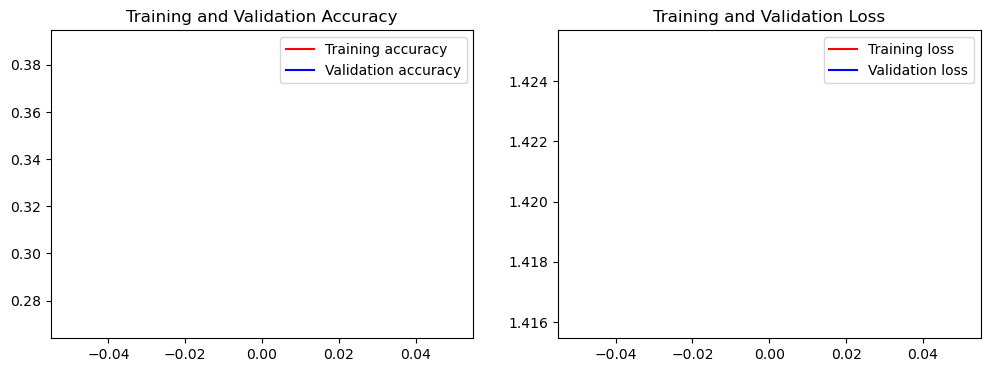

Found 5778 images belonging to 5 classes.
Found 826 images belonging to 5 classes.
Epoch 1/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 2520s 14s/step - accuracy: 0.3507 - loss: 1.5462 - val_accuracy: 0.3971 - val_loss: 1.4048
Epoch 2/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 142s 770ms/step - accuracy: 0.4024 - loss: 1.3991 - val_accuracy: 0.3971 - val_loss: 1.4044
Epoch 3/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 155s 846ms/step - accuracy: 0.3953 - loss: 1.4007 - val_accuracy: 0.3971 - val_loss: 1.4045
Epoch 4/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 156s 855ms/step - accuracy: 0.3907 - loss: 1.4123 - val_accuracy: 0.3971 - val_loss: 1.4060
Epoch 5/10
 94/181 ━━━━━━━━━━━━━━━━━━━━ 12:37 9s/step - accuracy: 0.3983 - loss: 1.4002  

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import numpy as np

# Define the paths
train_dir = 'C:\\Users\\vinnu\\Desktop\\6th Sem\\New folder\\New folder\\mini_project\\Dataset\\train'
val_dir = 'C:\\Users\\vinnu\\Desktop\\6th Sem\\New folder\\New folder\\mini_project\\Dataset\\test'

# Preprocess images with contrast enhancement
def enhance_contrast(img_array, enhancement_factor=1.5):
    img = Image.fromarray(np.uint8(img_array * 255))  # Convert array to Image object
    enhancer = ImageEnhance.Contrast(img)
    enhanced_img = enhancer.enhance(enhancement_factor)
    return np.array(enhanced_img) / 255.0  # Convert back to numpy array and normalize

# Use ImageDataGenerator for augmenting/normalizing data and passing it to the model
train_datagen = ImageDataGenerator(rescale=1.0/255.0, preprocessing_function=lambda x: enhance_contrast(x))
val_datagen = ImageDataGenerator(rescale=1.0/255.0, preprocessing_function=lambda x: enhance_contrast(x))

# Define the generators
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(150, 150),
                                                batch_size=32,
                                                class_mode='categorical')

# Build a simple model (You can replace this with your actual model)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')  # Adjust output layer based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and capture the history
history = model.fit(train_generator,steps_per_epoch=len(train_generator),epochs=1,  # Adjust the number of epochs
                    validation_data=val_generator,        
                    validation_steps=len(val_generator))

# Plot training & validation accuracy values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

import tensorflow as tf

class MyCustomDataset(tf.data.Dataset):
    def __init__(self, *args, **kwargs):
        # Properly initialize the base class
        super().__init__(**kwargs)  # This line is crucial to avoid the warning
        # Your custom initialization code here
        self.data = args[0]  # Example of handling custom arguments

    def _generator(self):
        # Yield data in the format needed by Keras
        for item in self.data:
            yield item

    def __new__(cls, *args, **kwargs):
        return tf.data.Dataset.from_generator(
            cls._generator,
            output_signature=(tf.TensorSpec(shape=(None, ), dtype=tf.float32),)
        )

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import numpy as np
import os

# Set paths and parameters
train_path = 'C:\\Users\\vinnu\\Desktop\\6th Sem\\New folder\\New folder\\mini_project\\Dataset\\train'
valid_path = os.path.join(base_dir, 'val')
num_classes = 5  # Number of classes

# Create ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalizing pixel values
    horizontal_flip=True,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2
)

valid_datagen = ImageDataGenerator(
    rescale=1./255  # Normalizing pixel values
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # For multi-class classification
)

valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # For multi-class classification
)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')  # Adjust to match the number of classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # For multi-class classification
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10
)

# Print accuracy and loss
print("Training Accuracy: ", history.history['accuracy'][-1])
print("Validation Accuracy: ", history.history['val_accuracy'][-1])
print("Training Loss: ", history.history['loss'][-1])
print("Validation Loss: ", history.history['val_loss'][-1])

# Plot training & validation accuracy and loss
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(12, 8))

# Accuracy plot
plt.subplot(2, 1, 1)
plt.plot(epochs, history.history['accuracy'], 'r', label='Training accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation accuracy')
plt.axhline(y=final_train_acc, color='r', linestyle='--', label=f'Final Training Accuracy: {final_train_acc:.4f}')
plt.axhline(y=final_val_acc, color='b', linestyle='--', label=f'Final Validation Accuracy: {final_val_acc:.4f}')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(2, 1, 2)
plt.plot(epochs, history.history['loss'], 'r', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.axhline(y=final_train_loss, color='r', linestyle='--', label=f'Final Training Loss: {final_train_loss:.4f}')
plt.axhline(y=final_val_loss, color='b', linestyle='--', label=f'Final Validation Loss: {final_val_loss:.4f}')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

